# Proceso de Clasificación 

## 1. Análisis de la distribución de los datos

In [47]:
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_curve
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

# Versiones anteriores a 1.2 de sklearn: from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import pickle

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import RandomForestClassifier
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 
from sklearn import tree
import sklearn as sklearn

import scipy.stats as stats
%matplotlib inline


In [2]:
df2017 = pd.read_csv('data/data2017.csv', encoding="ISO-8859-1", delimiter=',')
df2021 = pd.read_csv('data/data2021.csv', encoding="ISO-8859-1", delimiter=',')

# 1. Conocer lo datos


In [3]:
# Impresión de algunos registros del dataframe
display(df2017.sample(5))
display(df2021.sample(5))

,DIRECTORIO,LOCALIDAD,CLASE,NVCBP15D,NVCBP15F,NVCBP11C,NVCBP11AA,NVCBP8A,NVCBP8G,NVCBP11B,NVCBP13,NVCBP15H,ENFERMEDADES_R
98118,284051,PUENTE ARANDA,1,1,1,1,3,1,2,1,4,1,2
30166,154899,desconocido,1,2,2,1,1,2,2,1,4,2,2
54218,185456,ENGATIVA,1,1,2,1,4,2,2,1,4,1,2
101592,294242,SAN CRISTOBAL,1,2,2,1,2,2,2,1,4,2,2
101453,294100,SAN CRISTOBAL,1,1,2,1,2,2,2,1,6,2,2


,DIRECTORIO,LOCALIDAD,CLASE,NVCBP15D,NVCBP15F,NVCBP11C,NVCBP11AA,NVCBP8A,NVCBP8G,NVCBP11B,NVCBP13,NVCBP15H,ENFERMEDADES_R
27099,996657.0,UsaquÃ©n,1,2,1,1,2.0,2,2,1,4,1,2
81264,1150735.0,Puente Aranda,1,2,1,1,3.0,2,2,1,4,2,2
74100,1137066.0,Antonio NariÃ±o,1,2,2,1,3.0,1,2,1,1,2,2
9464,334112.0,Barrios Unidos,1,1,2,1,3.0,2,2,1,4,2,2
94244,1458037.0,Chapinero,3,2,2,2,2.0,2,2,2,4,1,2


In [4]:
# Impresión del tipo de dato asociado a cada columna
df2017.dtypes

DIRECTORIO         int64
LOCALIDAD         object
CLASE              int64
NVCBP15D           int64
NVCBP15F           int64
NVCBP11C           int64
NVCBP11AA          int64
NVCBP8A            int64
NVCBP8G            int64
NVCBP11B           int64
NVCBP13            int64
NVCBP15H           int64
ENFERMEDADES_R     int64
dtype: object

In [5]:
df2021.dtypes

DIRECTORIO        float64
LOCALIDAD          object
CLASE               int64
NVCBP15D            int64
NVCBP15F            int64
NVCBP11C            int64
NVCBP11AA         float64
NVCBP8A             int64
NVCBP8G             int64
NVCBP11B            int64
NVCBP13             int64
NVCBP15H            int64
ENFERMEDADES_R      int64
dtype: object

### Distribución de los datos 

Diccionario de columnas

Directorio = Identificador único de cada vivienda

Clase = Área de la vivienda: (1: Cabecera, 2: Centros Poblados, 3: área rural dispersa)

NVCBP15D = Contaminación del aire (1: Sí, 2: No)

NVCBP15F = Disposición inadecuada de las basuras (1: Sí, 2: No)

NVCBP11C = Tiene Alcantarillado? (1: Sí, 2: No)

NVCBP11AA = Estrato (1-6)

NVCBP8A = Humedades en el techo o en las paredes? (1: Sí, 2: No, 9: No responde/No sabe)

NVCBP8G = Escasa ventilación? (1: Sí, 2: No, 9: No responde/No sabe)

NVCBP11B = Tiene Acueducto? (1: Sí, 2: No)

NVCBP13 = ¿Cuál es el material predominante de los pisos?: 

1. Alfombra o tapete de pared a pared
2. Madera pulida y lacada, parqué
3. Mármol
4. Baldosa, vinilo, tableta, ladrillo, laminado o flotante
5. Madera burda, tabla o tablón, otro vegetal
6. Cemento, gravilla
7. Tierra, arena, barro

NVCBP15H = Presencia de insectos, roedores o animales que causen molestia (1: Sí, 2: No)

Enfermedades_r: Presenta enfermedades respiratorias? (1: Sí, 2: No)

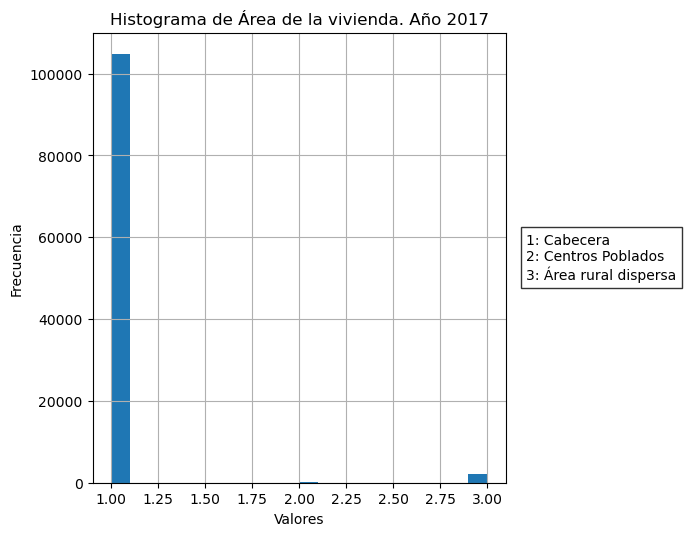

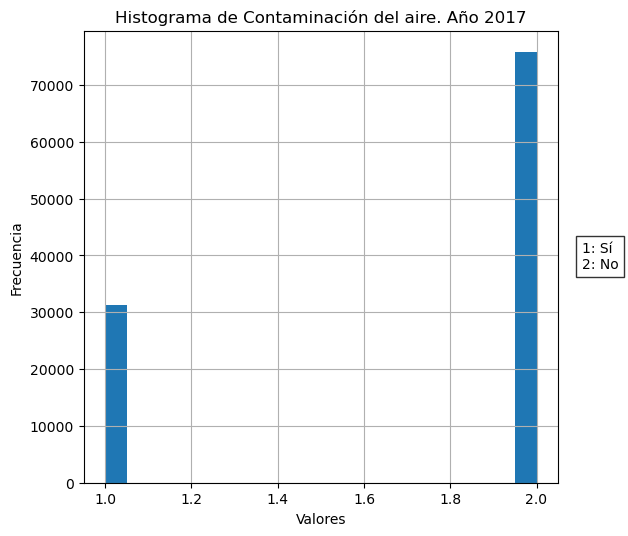

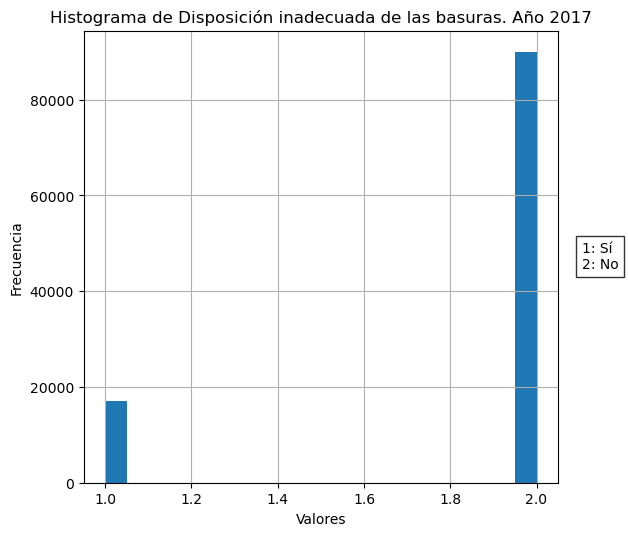

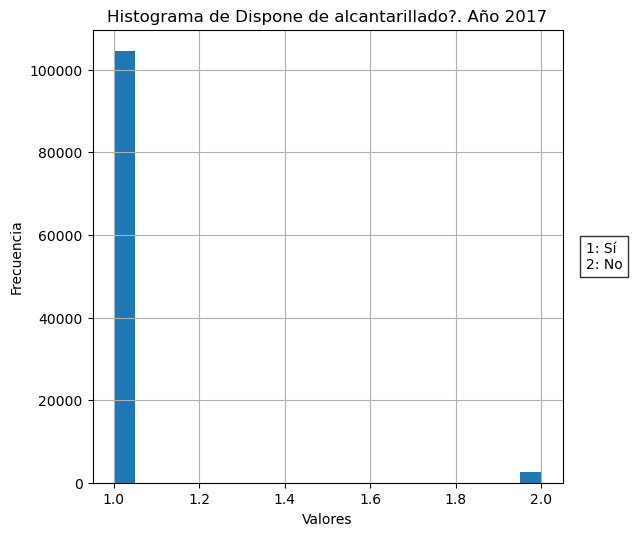

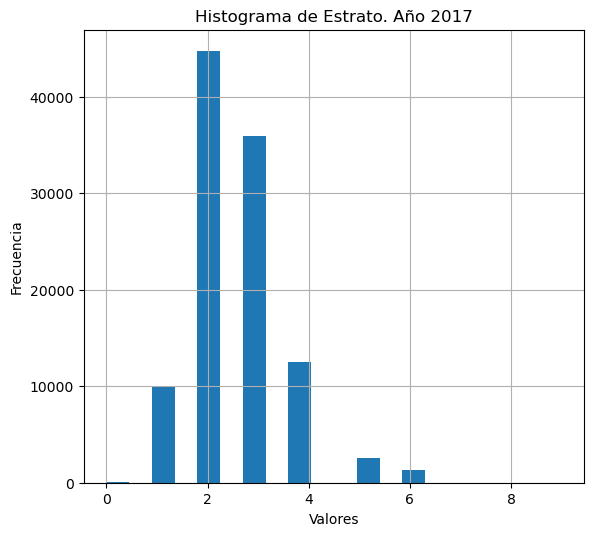

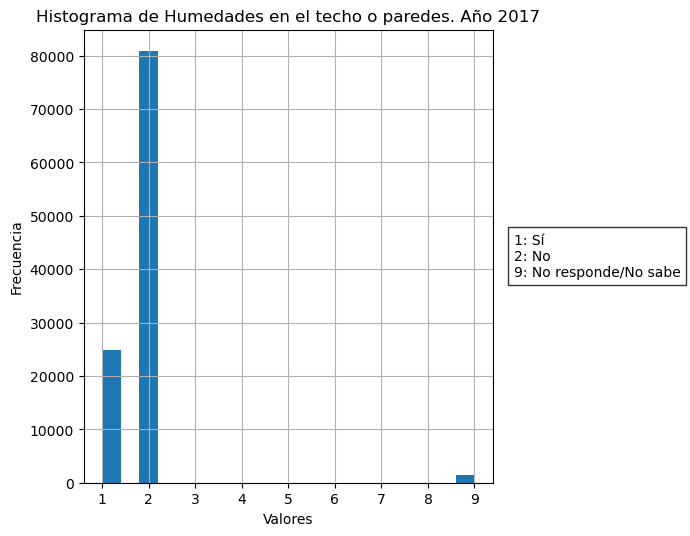

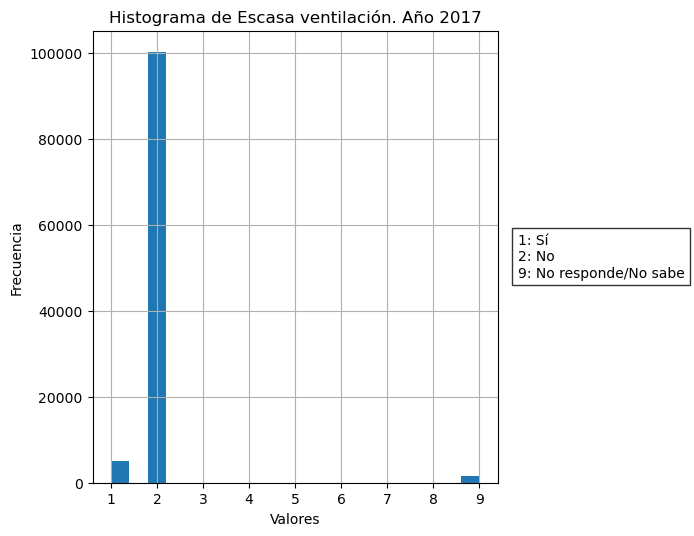

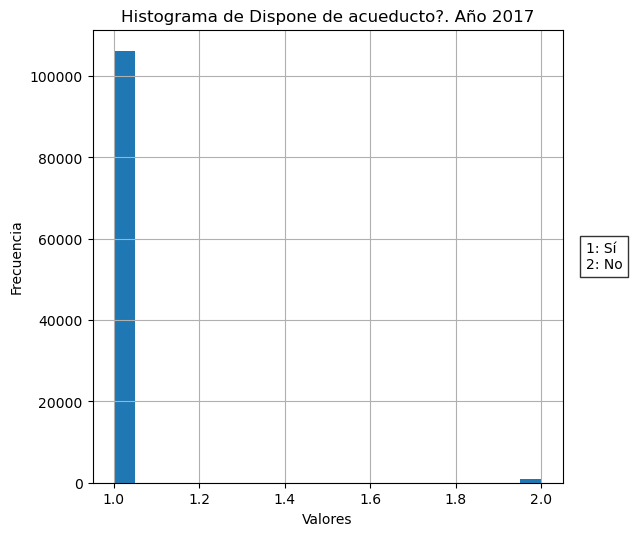

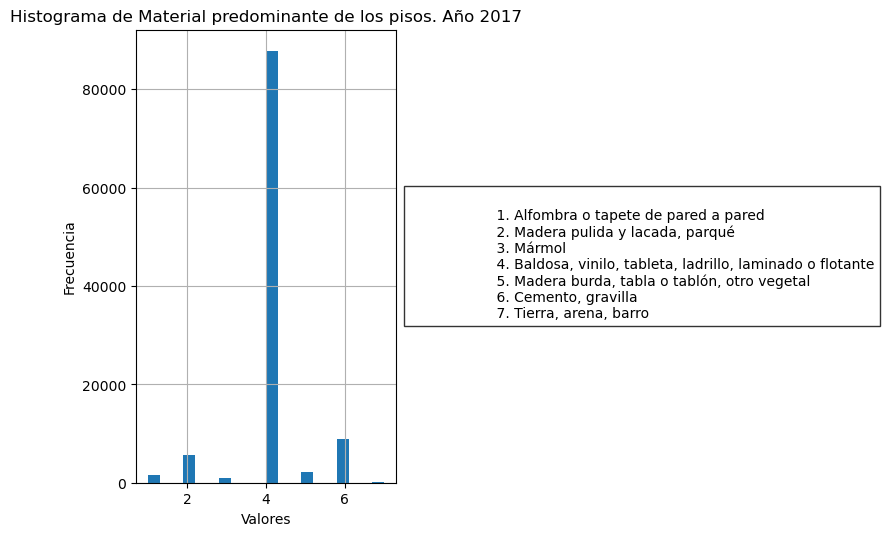

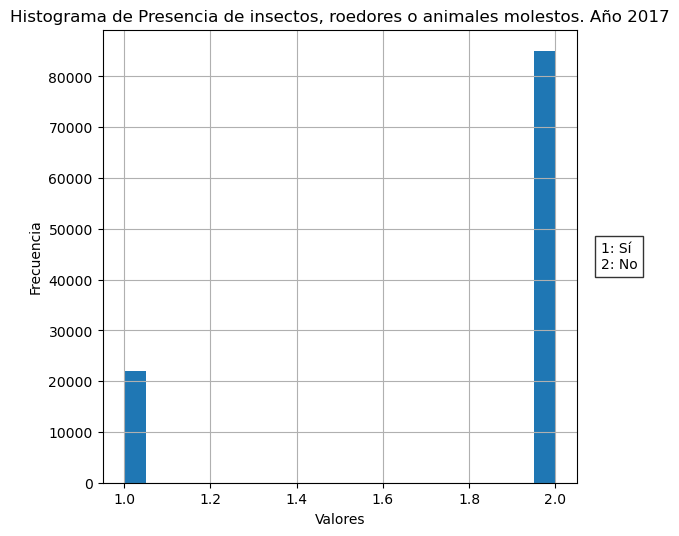

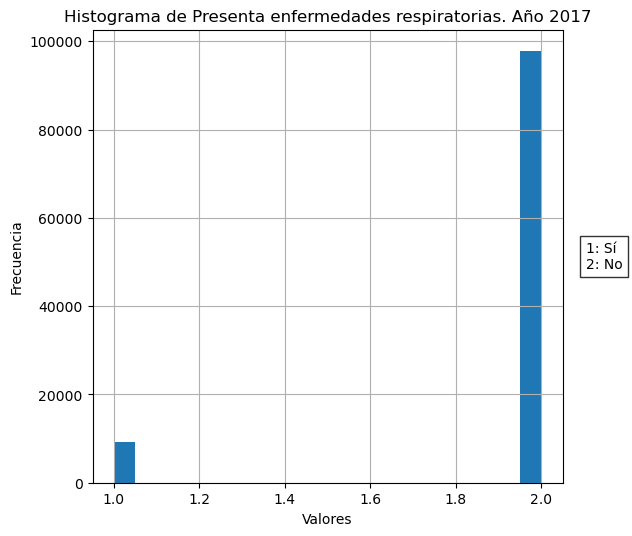

In [6]:

# Diccionario de nombres de columnas
diccionario_columnas = {
    'DIRECTORIO': 'Identificador único de cada vivienda',
    'CLASE': 'Área de la vivienda',
    'NVCBP15D': 'Contaminación del aire',
    'NVCBP15F': 'Disposición inadecuada de las basuras',
    'NVCBP11C': 'Dispone de alcantarillado?',
    'NVCBP11AA': 'Estrato',
    'NVCBP8A': 'Humedades en el techo o paredes',
    'NVCBP8G': 'Escasa ventilación',
    'NVCBP11B': 'Dispone de acueducto?',
    'NVCBP13': 'Material predominante de los pisos',
    'NVCBP15H': 'Presencia de insectos, roedores o animales molestos',
    'ENFERMEDADES_R': 'Presenta enfermedades respiratorias'
}

for columna in df2017.columns:
    if columna != 'DIRECTORIO' and pd.api.types.is_numeric_dtype(df2017[columna]):
        plt.figure(figsize=(12, 6))  # Tamaño de la figura

        # Ajuste del tamaño del histograma y del cuadro informativo
        ax = plt.subplot(1, 2, 1)  # Para el histograma
        plt.subplots_adjust(right=0.7)  # Ajuste del espacio a la derecha para el cuadro informativo
        df2017[columna].hist(bins=20)  # Elige el número de bins según tus datos
        plt.xlabel('Valores')
        plt.ylabel('Frecuencia')
        plt.title(f'Histograma de {diccionario_columnas[columna]}. Año 2017')

        # Cuadro informativo
        if columna in diccionario_columnas:
            if columna not in ['NVCBP11AA']:  # Excluir cuadro informativo para 'Estrato'
                cuadro_texto = ''
                if columna == 'CLASE':
                    cuadro_texto = '1: Cabecera\n2: Centros Poblados\n3: Área rural dispersa'
                elif columna == 'NVCBP13':
                    cuadro_texto = '''
                    1. Alfombra o tapete de pared a pared
                    2. Madera pulida y lacada, parqué
                    3. Mármol
                    4. Baldosa, vinilo, tableta, ladrillo, laminado o flotante
                    5. Madera burda, tabla o tablón, otro vegetal
                    6. Cemento, gravilla
                    7. Tierra, arena, barro'''
                else:
                    cuadro_texto = '1: Sí\n2: No'
                    if 9 in df2017[columna].values:
                        cuadro_texto += '\n9: No responde/No sabe'

                plt.text(1.05, 0.5, cuadro_texto, transform=ax.transAxes,
                         bbox=dict(facecolor='white', alpha=0.8), verticalalignment='center')

        plt.tight_layout(pad=3.0)  # Ajuste de espaciado entre subgráficos
        plt.show()


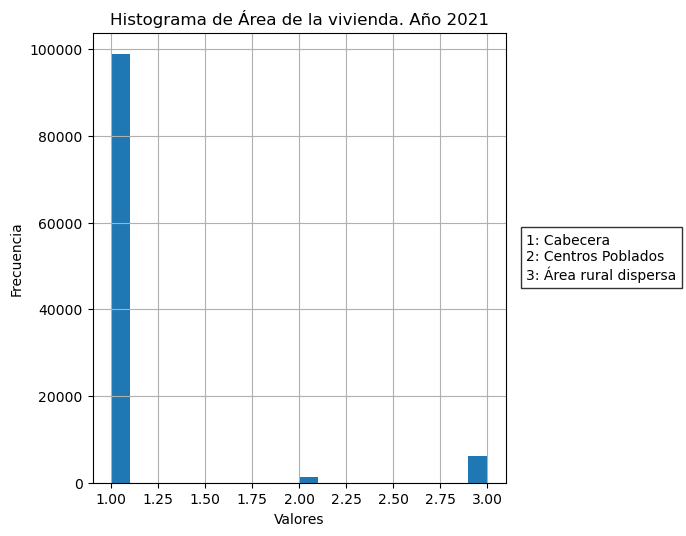

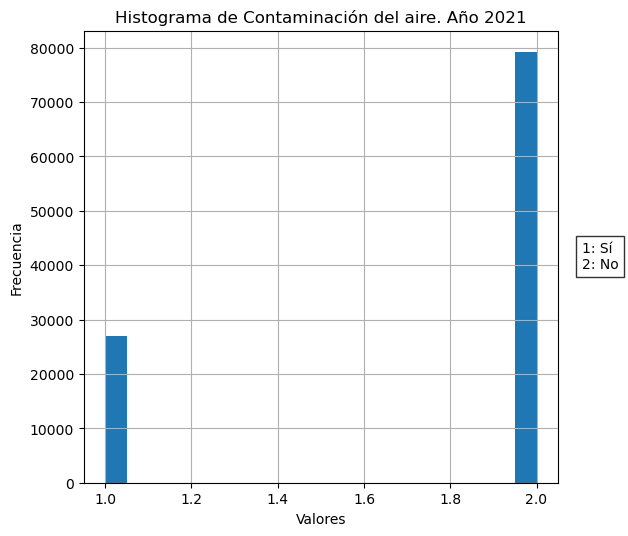

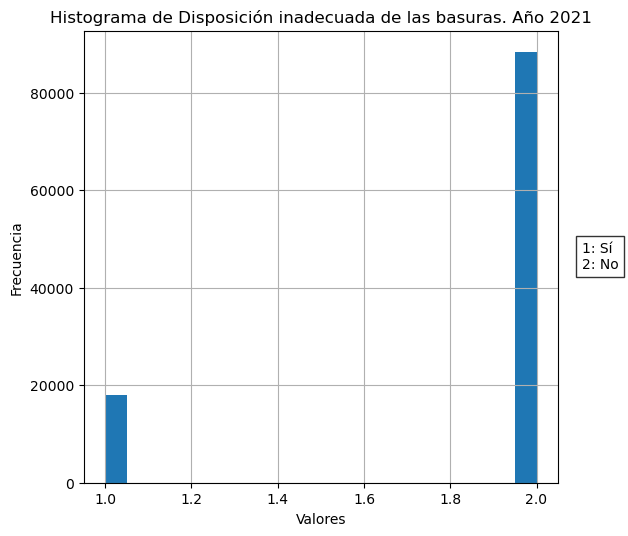

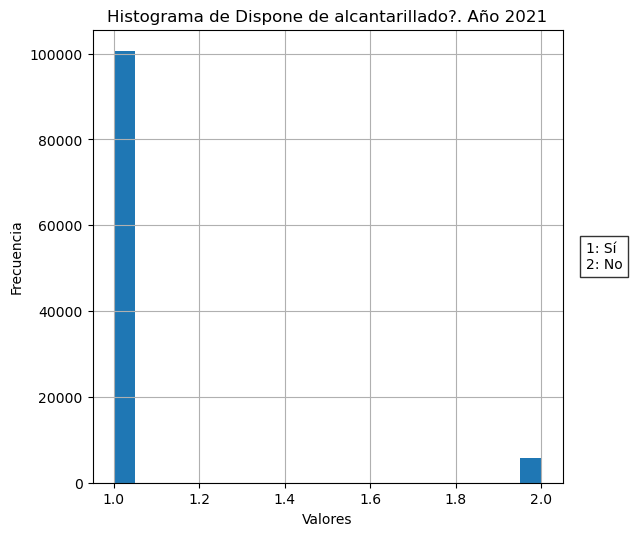

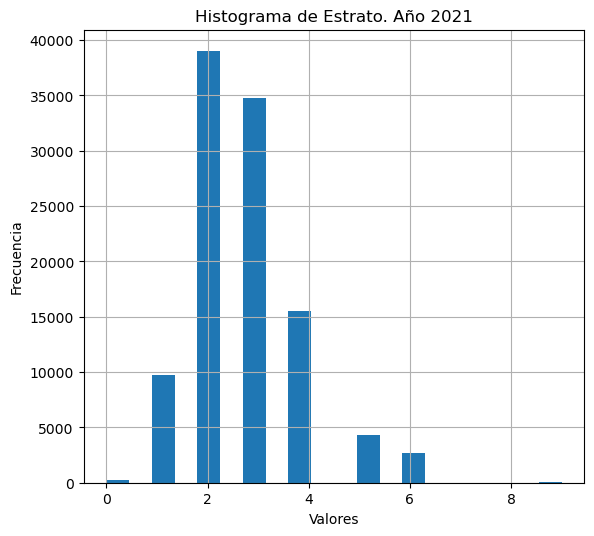

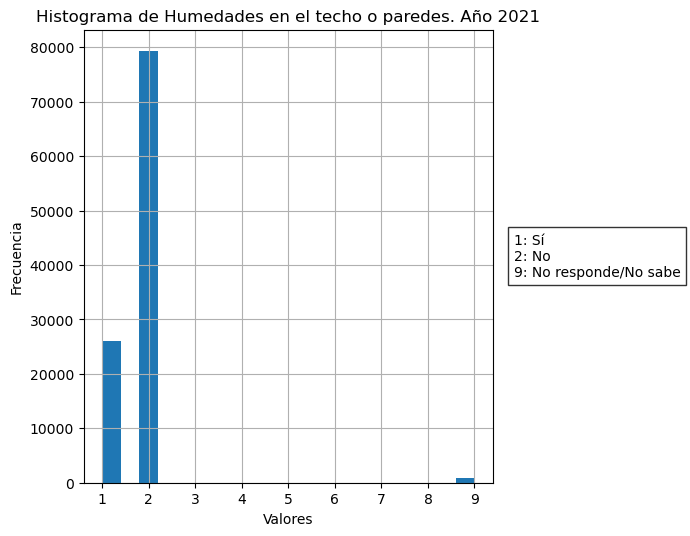

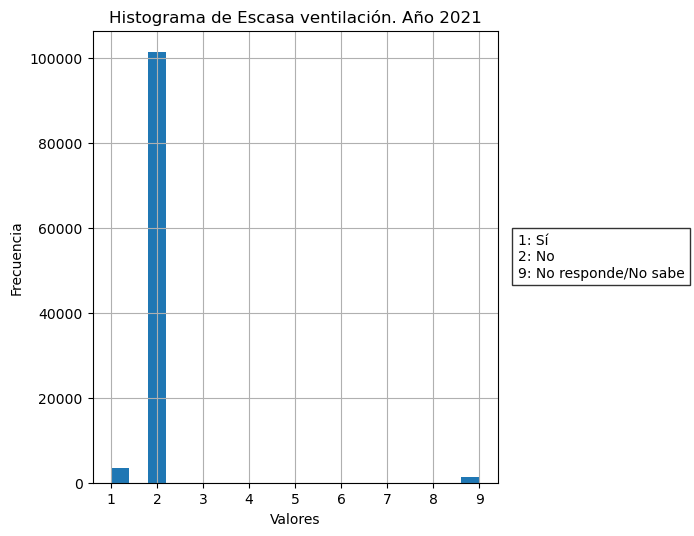

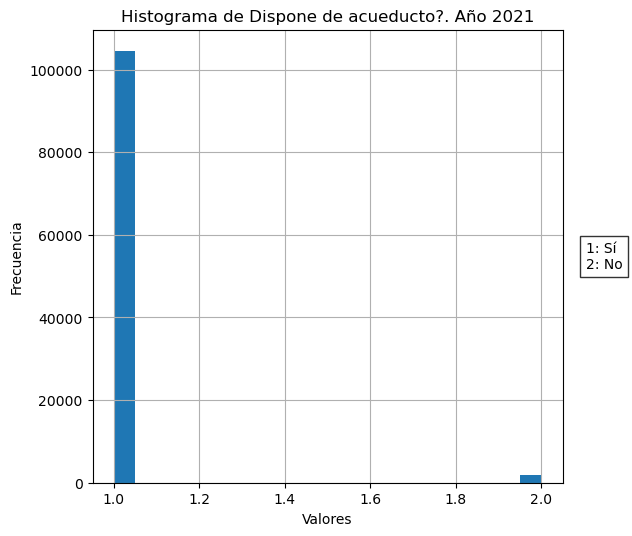

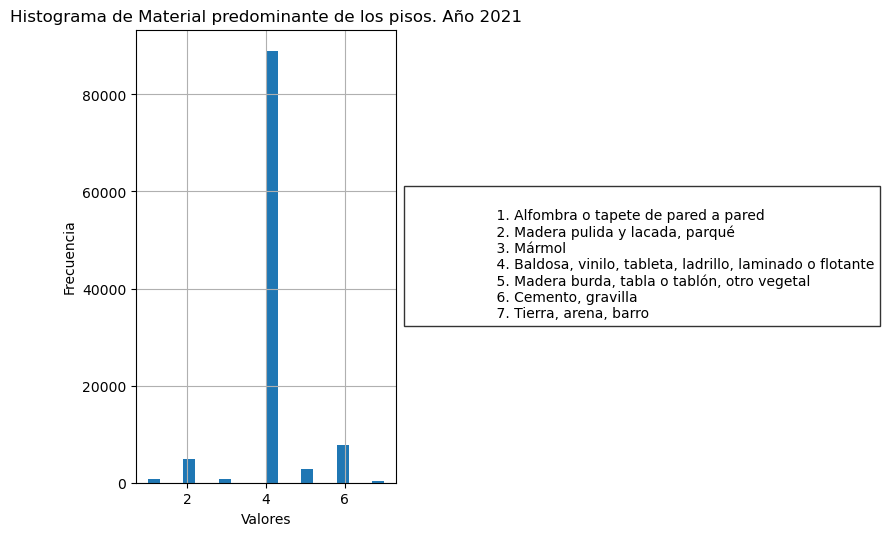

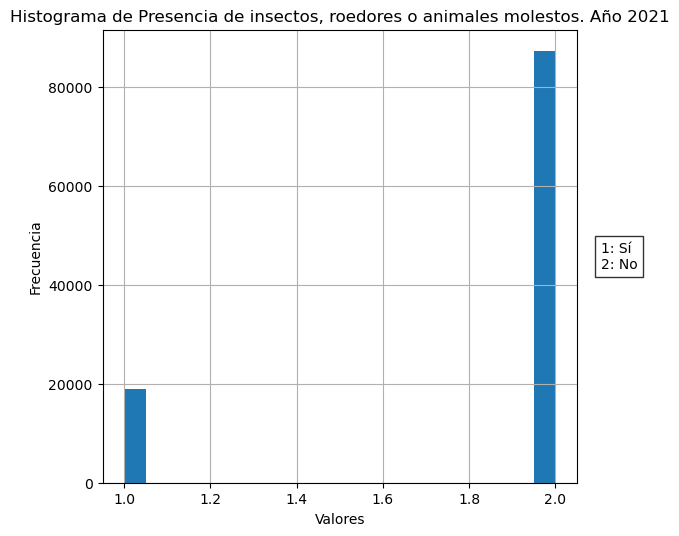

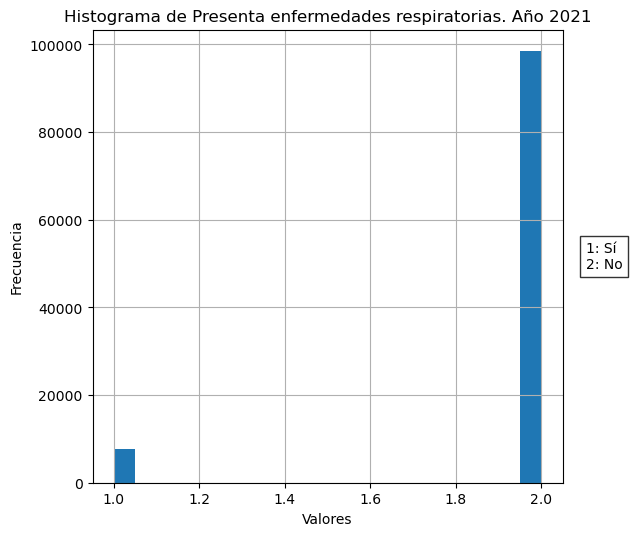

In [7]:

# Diccionario de nombres de columnas
diccionario_columnas = {
    'DIRECTORIO': 'Identificador único de cada vivienda',
    'CLASE': 'Área de la vivienda',
    'NVCBP15D': 'Contaminación del aire',
    'NVCBP15F': 'Disposición inadecuada de las basuras',
    'NVCBP11C': 'Dispone de alcantarillado?',
    'NVCBP11AA': 'Estrato',
    'NVCBP8A': 'Humedades en el techo o paredes',
    'NVCBP8G': 'Escasa ventilación',
    'NVCBP11B': 'Dispone de acueducto?',
    'NVCBP13': 'Material predominante de los pisos',
    'NVCBP15H': 'Presencia de insectos, roedores o animales molestos',
    'ENFERMEDADES_R': 'Presenta enfermedades respiratorias'
}

for columna in df2021.columns:
    if columna != 'DIRECTORIO' and pd.api.types.is_numeric_dtype(df2021[columna]):
        plt.figure(figsize=(12, 6))  # Tamaño de la figura

        # Ajuste del tamaño del histograma y del cuadro informativo
        ax = plt.subplot(1, 2, 1)  # Para el histograma
        plt.subplots_adjust(right=0.7)  # Ajuste del espacio a la derecha para el cuadro informativo
        df2021[columna].hist(bins=20)  # Elige el número de bins según tus datos
        plt.xlabel('Valores')
        plt.ylabel('Frecuencia')
        plt.title(f'Histograma de {diccionario_columnas[columna]}. Año 2021')

        # Cuadro informativo
        if columna in diccionario_columnas:
            if columna not in ['NVCBP11AA']:  # Excluir cuadro informativo para 'Estrato'
                cuadro_texto = ''
                if columna == 'CLASE':
                    cuadro_texto = '1: Cabecera\n2: Centros Poblados\n3: Área rural dispersa'
                elif columna == 'NVCBP13':
                    cuadro_texto = '''
                    1. Alfombra o tapete de pared a pared
                    2. Madera pulida y lacada, parqué
                    3. Mármol
                    4. Baldosa, vinilo, tableta, ladrillo, laminado o flotante
                    5. Madera burda, tabla o tablón, otro vegetal
                    6. Cemento, gravilla
                    7. Tierra, arena, barro'''
                else:
                    cuadro_texto = '1: Sí\n2: No'
                    if 9 in df2017[columna].values:
                        cuadro_texto += '\n9: No responde/No sabe'

                plt.text(1.05, 0.5, cuadro_texto, transform=ax.transAxes,
                         bbox=dict(facecolor='white', alpha=0.8), verticalalignment='center')

        plt.tight_layout(pad=3.0)  # Ajuste de espaciado entre subgráficos
        plt.show()


### Preparación de los datos

Un aspecto muy importante para tener en cuenta son los requerimientos de entrada de los algoritmos de aprendizaje implementados en las librerías utilizadas. En particular, scikit-learn requiere que todos los atributos sean numéricos y que la variable objetivo, en una tarea de clasificación, esté codificada con números.

In [8]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
df2017_copy = df2017.copy()
df2021_copy = df2021.copy()
# # Eliminación de registros duplicados.
# df2017_copy=df2017_copy.drop_duplicates()

Transformación de la variable objetivo 

In [9]:
# Para hacer la transformación o codificación de la variable objetivo utilizaremos la función labelEncoder. Es importante 
# que tengas en cuenta que, aunque la representación de esta variable sea numérica, la tarea a resolver seguirá siendo 
# una clasificación.
# Primero tenemos que generar el objeto.
codificacion = LabelEncoder()

### Caso 1. Tenemos la variable objetivo dentro del df, es decir, nos dan la variable Objetivo

In [10]:
# Ahora se ajusta a los datos.
df2017_copy['ENFERMEDADES_R']=codificacion.fit_transform(df2017_copy['ENFERMEDADES_R'])

# Visualización de la clase. Ya no es Sí o No, sino, 1 o 0 (Binaria). 1: No, 0: Sí
df2017_copy['ENFERMEDADES_R'].value_counts()

1    97741
0     9285
Name: ENFERMEDADES_R, dtype: int64

In [11]:
# Ahora se ajusta a los datos.
df2021_copy['ENFERMEDADES_R']=codificacion.fit_transform(df2021_copy['ENFERMEDADES_R'])

# Visualización de la clase. Ya no es Sí o No, sino, 1 o 0 (Binaria). 1: No, 0: Sí
df2021_copy['ENFERMEDADES_R'].value_counts()

1    98434
0     7795
Name: ENFERMEDADES_R, dtype: int64

### Selección de atributos / features para la clasificación

No todos las columnas disponibles en el conjunto de datos son aptas para ser usadas como features para el entrenamiento del modelo.  

Se seleccionan las que consideremos aptas para tener en cuenta.

### Seleccionamos los factores ambientales

In [12]:
features = ['CLASE', 'NVCBP11C', 'NVCBP8A', 'NVCBP8G', 'NVCBP11B', 'NVCBP13', 'NVCBP15H', 'NVCBP11AA']

Correlación de las features

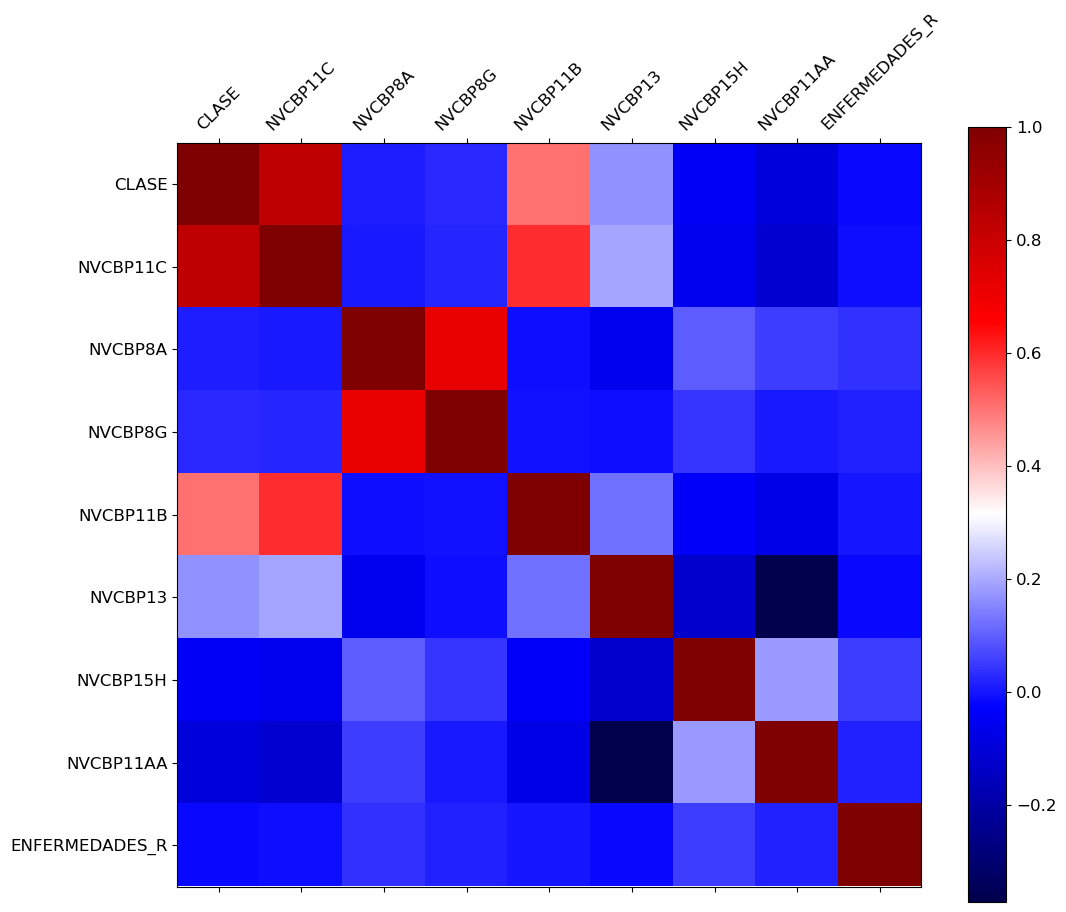

In [38]:
f = plt.figure(figsize = (12, 10))
ft = features + ["ENFERMEDADES_R"]
plt.matshow(df2017[ft].corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(len(ft)), ft, fontsize = 12, rotation = 45)
plt.yticks(range(len(ft)), ft, fontsize = 12)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize = 12)

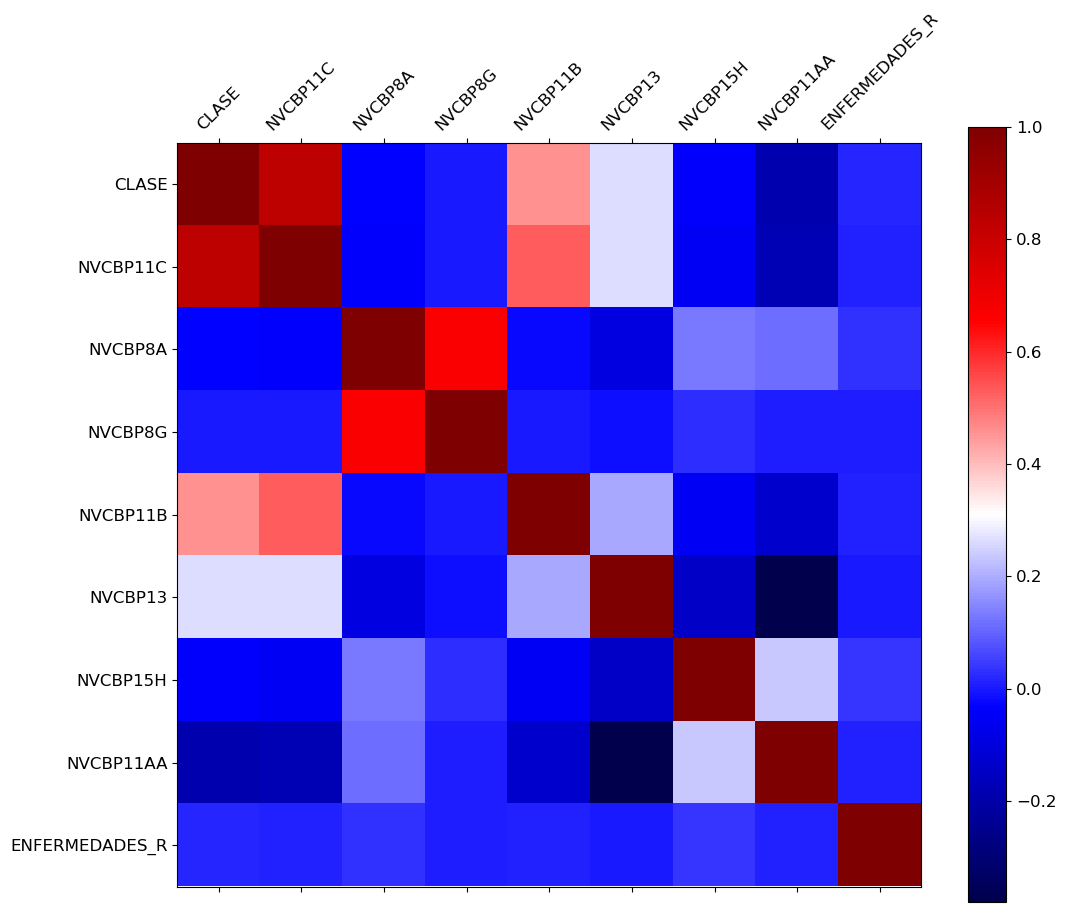

In [39]:
f = plt.figure(figsize = (12, 10))
ft = features + ["ENFERMEDADES_R"]
plt.matshow(df2021[ft].corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(len(ft)), ft, fontsize = 12, rotation = 45)
plt.yticks(range(len(ft)), ft, fontsize = 12)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize = 12)

In [13]:
# Eliminaremos las variables que consideramos no son útiles para la tarea que queremos resolver, como los identificadores.
df2017_copy = df2017_copy.drop(['DIRECTORIO'], axis=1)
df2021_copy = df2021_copy.drop(['DIRECTORIO'], axis=1)

# Construcción del modelo

### 0. Los algoritmos supervisados implementados en scikit-learn requieren que las variables de entrada estén separadas de la variable objetivo. 

In [14]:
# Excluimos tanto la variable objetivo como la columna que se utilizó para crearla.
X17 = df2017_copy.drop(['ENFERMEDADES_R'], axis=1)
X21 = df2021_copy.drop(['ENFERMEDADES_R'], axis=1)

### 1. Particionamiento del conjunto de datos en entrenamiento y prueba 

Para determinar el rendimiento del modelo sobre datos nuevos (rendimiento de generalización) dividimos nuestros datos en dos conjuntos: uno para el entrenamiento y otro para el test.

Se utiliza la estrategia hold-out: 80% entrenamiento y 20% prueba

In [15]:
# Dividir los datos en conjuntos de entrenamiento y prueba
# 'test_size=0.2' indica que el 20% de los datos se reservarán para el conjunto de prueba,
# mientras que el 80% se utilizará para el conjunto de entrenamiento
# 'random_state=0' establece una semilla aleatoria para asegurar la reproducibilidad de la división
X17_train, X17_test, Y17_train, Y17_test = train_test_split(df2017_copy[features], df2017_copy['ENFERMEDADES_R'], test_size=0.2, random_state=0)
X21_train, X21_test, Y21_train, Y21_test = train_test_split(df2021_copy[features], df2021_copy['ENFERMEDADES_R'], test_size=0.2, random_state=0)

In [16]:
print('Tamaño del conjunto original 2017:', df2017_copy.shape[0])
print('Tamaño del conjunto de entrenamiento 2017:', X17_train.shape[0])
print('Tamaño del conjunto de prueba 2017:', X17_test.shape[0])

print('Tamaño del conjunto original 2021:', df2021_copy.shape[0])
print('Tamaño del conjunto de entrenamiento 2021:', X21_train.shape[0])
print('Tamaño del conjunto de prueba 2021:', X21_test.shape[0])

Tamaño del conjunto original 2017: 107026
Tamaño del conjunto de entrenamiento 2017: 85620
Tamaño del conjunto de prueba 2017: 21406
Tamaño del conjunto original 2021: 106229
Tamaño del conjunto de entrenamiento 2021: 84983
Tamaño del conjunto de prueba 2021: 21246


## Entrenamiento de un primer modelo usando KNN

In [17]:
knn_model17 = KNeighborsClassifier(n_neighbors = 3) # 5 neighbors is the default value
# Entrenamiento del "modelo"
knn_model17.fit(X17_train, Y17_train)
# Generación de predicciones para entrenamiento y test para el cálculo de errores
preds_train_17 = knn_model17.predict(X17_train)
preds_test_17 = knn_model17.predict(X17_test)

knn_model21 = KNeighborsClassifier(n_neighbors = 3) # 5 neighbors is the default value
# Entrenamiento del "modelo"
knn_model21.fit(X21_train, Y21_train)
# Generación de predicciones para entrenamiento y test para el cálculo de errores
preds_train_21 = knn_model21.predict(X21_train)
preds_test_21 = knn_model21.predict(X21_test)

In [18]:
# Se evalua la accuracy (1 - error) del "modelo" en ambos conjuntos en términos porcentuales: porcetaje de instancias bien etiquetadas:
print('Accuracy 2017 (train):', accuracy_score(Y17_train, preds_train_17))
print('Accuracy 2017 (test):', accuracy_score(Y17_test, preds_test_17))

print('Accuracy 2021 (train):', accuracy_score(Y21_train, preds_train_21))
print('Accuracy 2021 (test):', accuracy_score(Y21_test, preds_test_21))

Accuracy 2017 (train): 0.903363700070077
Accuracy 2017 (test): 0.9049799121741567
Accuracy 2021 (train): 0.9194074108939435
Accuracy 2021 (test): 0.9154193730584581


In [19]:
# Se calculan las diferentes métricas de error para una comparacion más directa:
pd.DataFrame([
    {
        'Train': accuracy_score(Y17_train, preds_train_17),
        'Test': accuracy_score(Y17_test, preds_test_17)
    },
    {
        'Train': precision_score(Y17_train, preds_train_17),
        'Test': precision_score(Y17_test, preds_test_17)
    },
    {
        'Train': recall_score(Y17_train, preds_train_17),
        'Test': recall_score(Y17_test, preds_test_17)
    },
    {
        'Train': f1_score(Y17_train, preds_train_17),
        'Test': f1_score(Y17_test, preds_test_17)
    }
], index = ['Accuracy 2017', 'Precision 2017', 'Recall 2017', 'F1 2017'])


,Train,Test
Accuracy 2017,0.903364,0.904980
Precision 2017,0.914232,0.915002
Recall 2017,0.986721,0.987840
F1 2017,0.949094,0.950027


In [20]:
pd.DataFrame([
    {
        'Train': accuracy_score(Y21_train, preds_train_21),
        'Test': accuracy_score(Y21_test, preds_test_21)
    },
    {
        'Train': precision_score(Y21_train, preds_train_21),
        'Test': precision_score(Y21_test, preds_test_21)
    },
    {
        'Train': recall_score(Y21_train, preds_train_21),
        'Test': recall_score(Y21_test, preds_test_21)
    },
    {
        'Train': f1_score(Y21_train, preds_train_21),
        'Test': f1_score(Y21_test, preds_test_21)
    }
], index = ['Accuracy 2021', 'Precision 2021', 'Recall 2021', 'F1 2021'])

,Train,Test
Accuracy 2021,0.919407,0.915419
Precision 2021,0.927725,0.924347
Recall 2021,0.990228,0.989457
F1 2021,0.957958,0.955794


## Entrenamiento de un tercer modelo pero usando Árboles de decisión

Este algoritmo **NO** es sensible a features en diferentes escalas razón por la cual no se requiere realizar el proceso de estandarización.
Los modelos de árboles de decisión son interesantes en la medida en que pueden ser interpretados como reglas de decisión. Es posible dibujar el árbol de decisión con el fin de entender dichas reglas.

#### Selección del mejor modelo

Para encontrar el mejor modelo de árbol de decisión que se ajuste a los datos produciendo errores tanto de entrenamiento como de prueba relativamente bajos es posible variar la profundiddad del árbol. Sin embargo, hay otros hiper-parámetros que también se pueden variar que controlan el proceso de entrenamiento como son el criterior de selección de la feature a utilizar para realizar el particionamiento de los datos en un nodo dado así como la cantidad de instancias mínimas necesarias para realizar un nuevo particionamiento, entre otros. En términos de la librería sklearn los hiper-parámetros son:  

* **criterion**: "gini", "entropy". Predeterminado = "gini"
* **max_depth:**: int. Predeterminado = None
* **min_samples_split** : int. Predeterminado = 2

En lugar de entrenar de forma manual tantos modelos como combinaciones de hiper-parámetros se quieran probar, la librería sklearn proporciona la clase GridSearchCV la cuál brinda la posibilidad de entrenar todos los modelos requeridos, evaluarlos y obtener el mejor modelo. Complementariamente, esta clase también brinda la posibilidad de realizar (K-Fold) Cross-validation con el objetivo de validar la estabilidad del modelo al ser entrenado con diferentes conjuntos de entrenamiento.

In [21]:
# Se crean los parámetros que se van a probar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 8, 12, 16, 20, 24, 28, 32, 36, 40],
    'min_samples_split': [2, 3, 4, 5]
}

In [22]:
tree_model_17 = DecisionTreeClassifier(random_state = 1) # Se crea el modelo
# Se crea el objeto que realizará la búsqueda de parámetros por validación cruzada
grid_tree_model_17 = GridSearchCV(tree_model_17, param_grid, scoring = ['precision', 'recall', 'f1'], refit = 'recall', cv = 10, n_jobs = -1, verbose = 1) 
grid_tree_model_17.fit(X17_train, Y17_train) # Se entrena el modelo

tree_model_21 = DecisionTreeClassifier(random_state = 1) # Se crea el modelo
# Se crea el objeto que realizará la búsqueda de parámetros por validación cruzada
grid_tree_model_21 = GridSearchCV(tree_model_21, param_grid, scoring = ['precision', 'recall', 'f1'], refit = 'recall', cv = 10, n_jobs = -1, verbose = 1)
grid_tree_model_21.fit(X21_train, Y21_train) # Se entrena el modelo

Fitting 10 folds for each of 80 candidates, totalling 800 fits


Fitting 10 folds for each of 80 candidates, totalling 800 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 12, 16, 20, 24, 28, 32, 36, 40],
                         'min_samples_split': [2, 3, 4, 5]},
             refit='recall', scoring=['precision', 'recall', 'f1'], verbose=1)

In [23]:
# Se puede obtener directamente los parámetros del mejor modelo encontrado
grid_tree_model_17.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2}

In [24]:
# Se puede obtener directamente los parámetros del mejor modelo encontrado
grid_tree_model_21.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}

In [25]:
# El score, en este caso F1, de dicho modelo
grid_tree_model_17.best_score_

0.9999872073685557

In [26]:
# El score, en este caso F1, de dicho modelo
grid_tree_model_21.best_score_

1.0

In [27]:
preds_train_17 = grid_tree_model_17.best_estimator_.predict(X17_train) # Se generan las predicciones para el conjunto de entrenamiento
preds_test_17 = grid_tree_model_17.best_estimator_.predict(X17_test) # Se generan las predicciones para el conjunto de prueba

preds_train_21 = grid_tree_model_21.best_estimator_.predict(X21_train) # Se generan las predicciones para el conjunto de entrenamiento
preds_test_21 = grid_tree_model_21.best_estimator_.predict(X21_test) # Se generan las predicciones para el conjunto de prueba

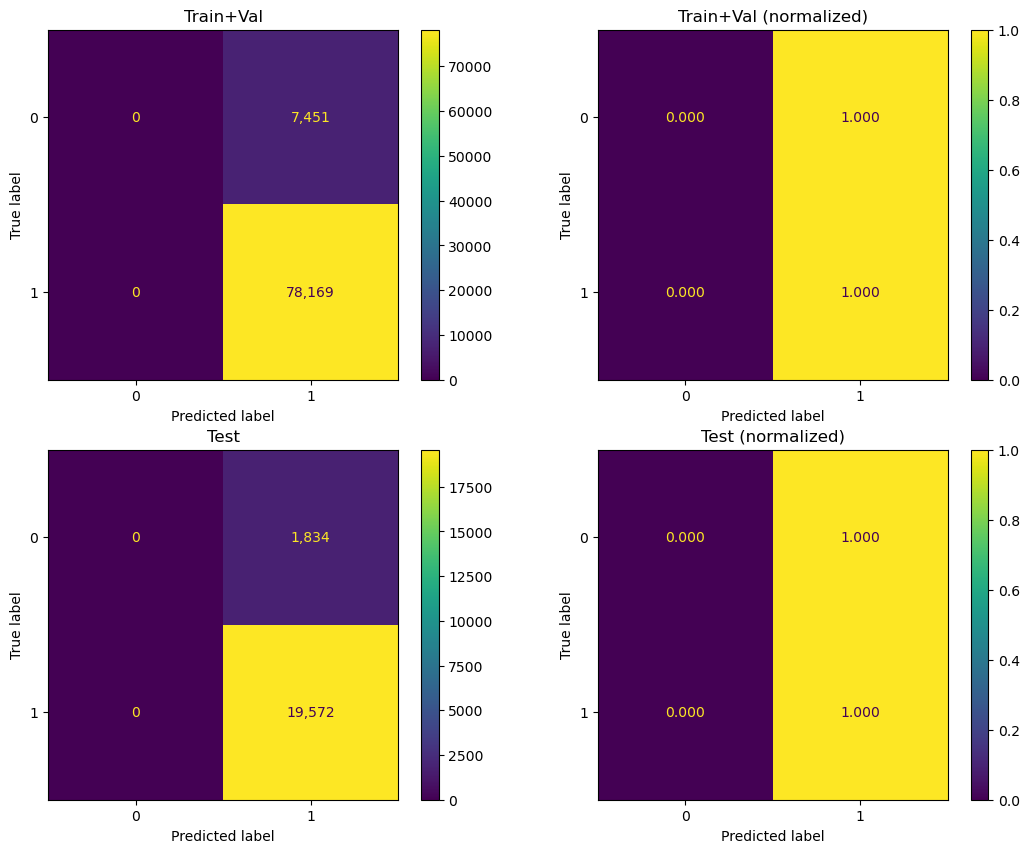

In [28]:
# Se empieza calculando la matriz de confusión
cm_train = confusion_matrix(Y17_train, preds_train_17, labels = grid_tree_model_17.best_estimator_.classes_)
cm_train_norm = confusion_matrix(Y17_train, preds_train_17, labels = grid_tree_model_17.best_estimator_.classes_, normalize = 'true')
cm_test = confusion_matrix(Y17_test, preds_test_17, labels = grid_tree_model_17.best_estimator_.classes_)
cm_test_norm = confusion_matrix(Y17_test, preds_test_17, labels = grid_tree_model_17.best_estimator_.classes_, normalize = 'true')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (13, 10))
ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = grid_tree_model_17.best_estimator_.classes_).plot(ax = ax1, values_format = ',.0f')
ConfusionMatrixDisplay(confusion_matrix = cm_train_norm, display_labels = grid_tree_model_17.best_estimator_.classes_).plot(ax = ax2, values_format = '.3f')
ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = grid_tree_model_17.best_estimator_.classes_).plot(ax = ax3, values_format = ',.0f')
ConfusionMatrixDisplay(confusion_matrix = cm_test_norm, display_labels = grid_tree_model_17.best_estimator_.classes_).plot(ax = ax4, values_format = '.3f')

ax1.set_title('Train+Val')
ax2.set_title('Train+Val (normalized)')
ax3.set_title('Test')
ax4.set_title('Test (normalized)')
plt.show()

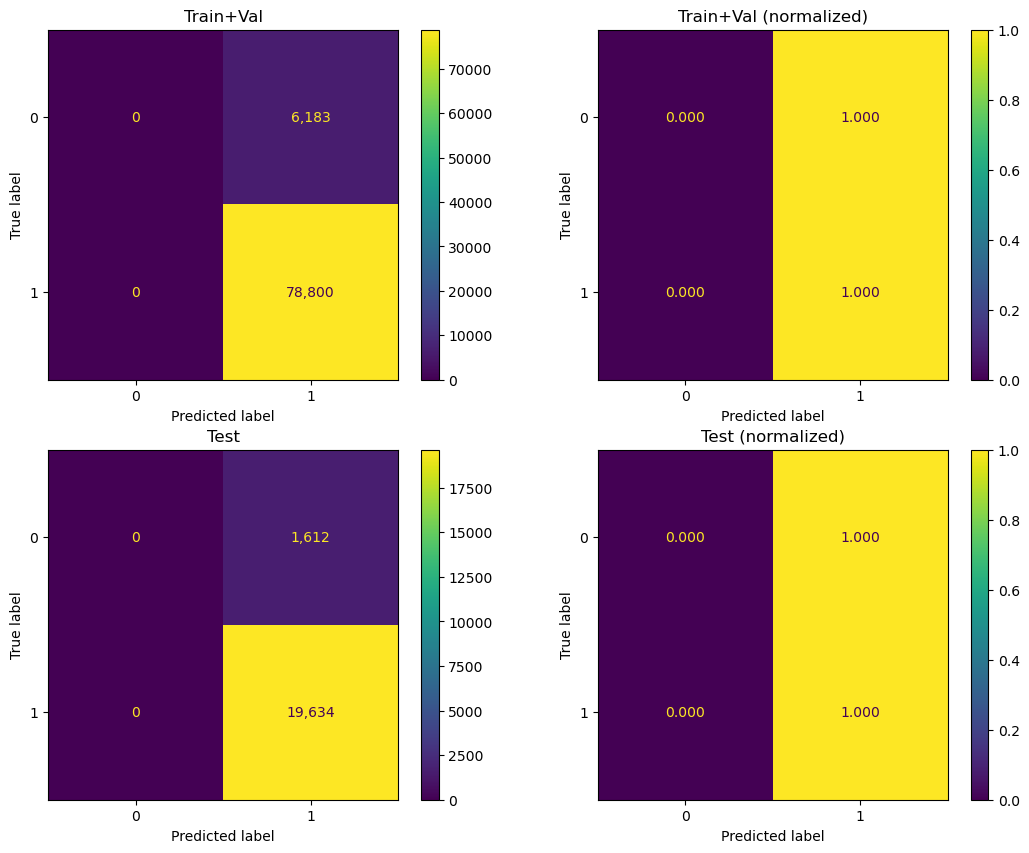

In [29]:
# Se empieza calculando la matriz de confusión
cm_train = confusion_matrix(Y21_train, preds_train_21, labels = grid_tree_model_21.best_estimator_.classes_)
cm_train_norm = confusion_matrix(Y21_train, preds_train_21, labels = grid_tree_model_21.best_estimator_.classes_, normalize = 'true')
cm_test = confusion_matrix(Y21_test, preds_test_21, labels = grid_tree_model_21.best_estimator_.classes_)
cm_test_norm = confusion_matrix(Y21_test, preds_test_21, labels = grid_tree_model_21.best_estimator_.classes_, normalize = 'true')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (13, 10))
ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = grid_tree_model_21.best_estimator_.classes_).plot(ax = ax1, values_format = ',.0f')
ConfusionMatrixDisplay(confusion_matrix = cm_train_norm, display_labels = grid_tree_model_21.best_estimator_.classes_).plot(ax = ax2, values_format = '.3f')

ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = grid_tree_model_21.best_estimator_.classes_).plot(ax = ax3, values_format = ',.0f')
ConfusionMatrixDisplay(confusion_matrix = cm_test_norm, display_labels = grid_tree_model_21.best_estimator_.classes_).plot(ax = ax4, values_format = '.3f')

ax1.set_title('Train+Val')
ax2.set_title('Train+Val (normalized)')
ax3.set_title('Test')
ax4.set_title('Test (normalized)')
plt.show()


In [30]:
# Se calculan las diferentes métricas de error para una comparacion más directa:
pd.DataFrame([
    {
        'Train+Val': accuracy_score(Y17_train, preds_train_17),
        'Test': accuracy_score(Y17_test, preds_test_17)
    },
    {
        'Train+Val': precision_score(Y17_train, preds_train_17),
        'Test': precision_score(Y17_test, preds_test_17)
    },
    {
        'Train+Val': recall_score(Y17_train, preds_train_17),
        'Test': recall_score(Y17_test, preds_test_17)
    },
    {
        'Train+Val': f1_score(Y17_train, preds_train_17),
        'Test': f1_score(Y17_test, preds_test_17)
    }
], index = ['Accuracy 2017', 'Precision 2017', 'Recall 2017', 'F1 2017'])

,Train+Val,Test
Accuracy 2017,0.912976,0.914323
Precision 2017,0.912976,0.914323
Recall 2017,1.000000,1.000000
F1 2017,0.954509,0.955244


In [31]:
pd.DataFrame([
    {
        'Train+Val': accuracy_score(Y21_train, preds_train_21),
        'Test': accuracy_score(Y21_test, preds_test_21)
    },
    {
        'Train+Val': precision_score(Y21_train, preds_train_21),
        'Test': precision_score(Y21_test, preds_test_21)
    },
    {
        'Train+Val': recall_score(Y21_train, preds_train_21),
        'Test': recall_score(Y21_test, preds_test_21)
    },
    {
        'Train+Val': f1_score(Y21_train, preds_train_21),
        'Test': f1_score(Y21_test, preds_test_21)
    }
], index = ['Accuracy 2021', 'Precision 2021', 'Recall 2021', 'F1 2021'])

,Train+Val,Test
Accuracy 2021,0.927244,0.924127
Precision 2021,0.927244,0.924127
Recall 2021,1.000000,1.000000
F1 2021,0.962249,0.960568


Un *insight* que se puede extraer de los modelos basados en árboles es la importancia asignada por el modelo a cada feature. Esta importancia puede ser interpretada como la contribución la feature al momento de realizar la predicción.

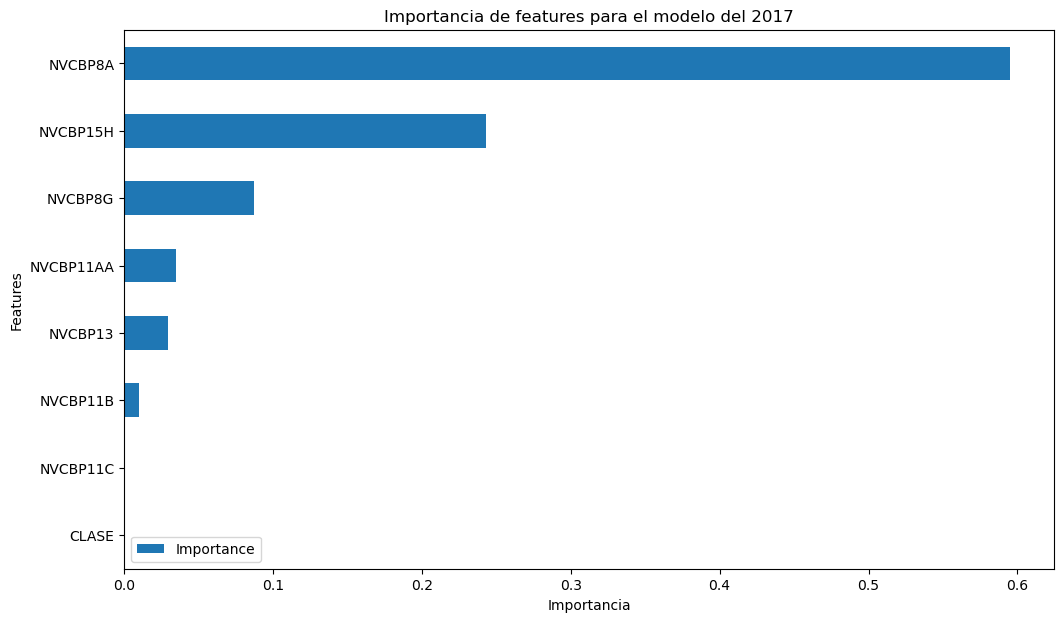

In [49]:
# Encontrar las features más importantes para el modelo 2017
best_tree_model_17 = grid_tree_model_17.best_estimator_
feature_importance_df_17 = pd.DataFrame([features, best_tree_model_17.feature_importances_]).T
feature_importance_df_17.columns = ['Feature', 'Importance']
feature_importance_df_17.sort_values(by='Importance').plot.barh(x='Feature', y='Importance', figsize=(12, 7))
plt.title('Importancia de features para el modelo del 2017')  # Agregar título al gráfico
plt.xlabel('Importancia')
plt.ylabel('Features')
plt.show()


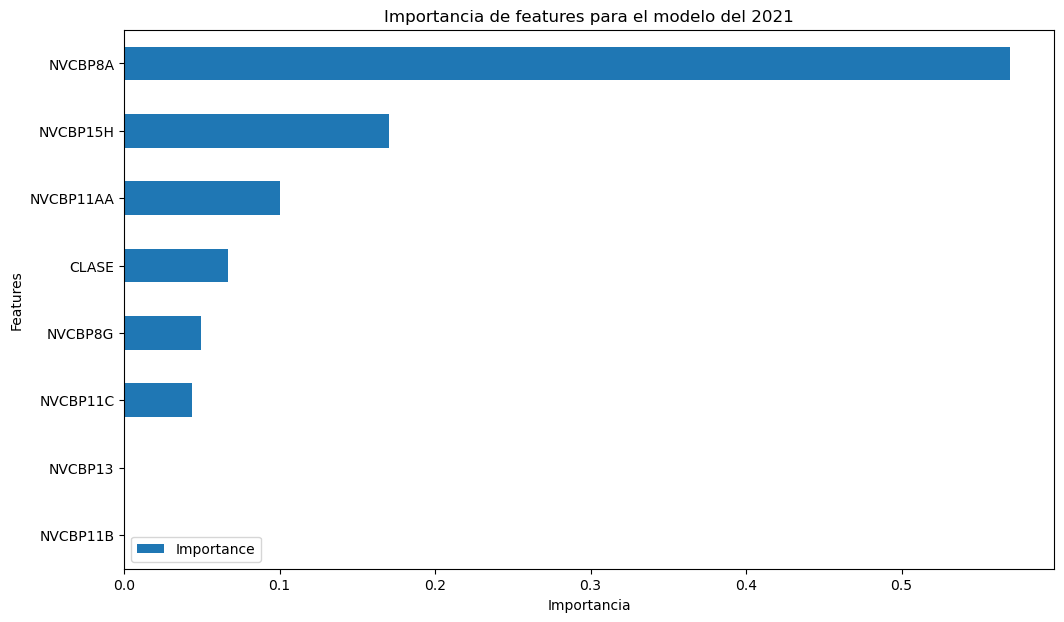

In [50]:
# Encontrar las features más importantes para el modelo 2021
best_tree_model_21 = grid_tree_model_21.best_estimator_
feature_importance_df_21 = pd.DataFrame([features, best_tree_model_21.feature_importances_]).T
feature_importance_df_21.columns = ['Feature', 'Importance']
feature_importance_df_21.sort_values(by='Importance').plot.barh(x='Feature', y='Importance', figsize=(12, 7))
plt.title('Importancia de features para el modelo del 2021')  # Agregar título al gráfico
plt.xlabel('Importancia')
plt.ylabel('Features')
plt.show()


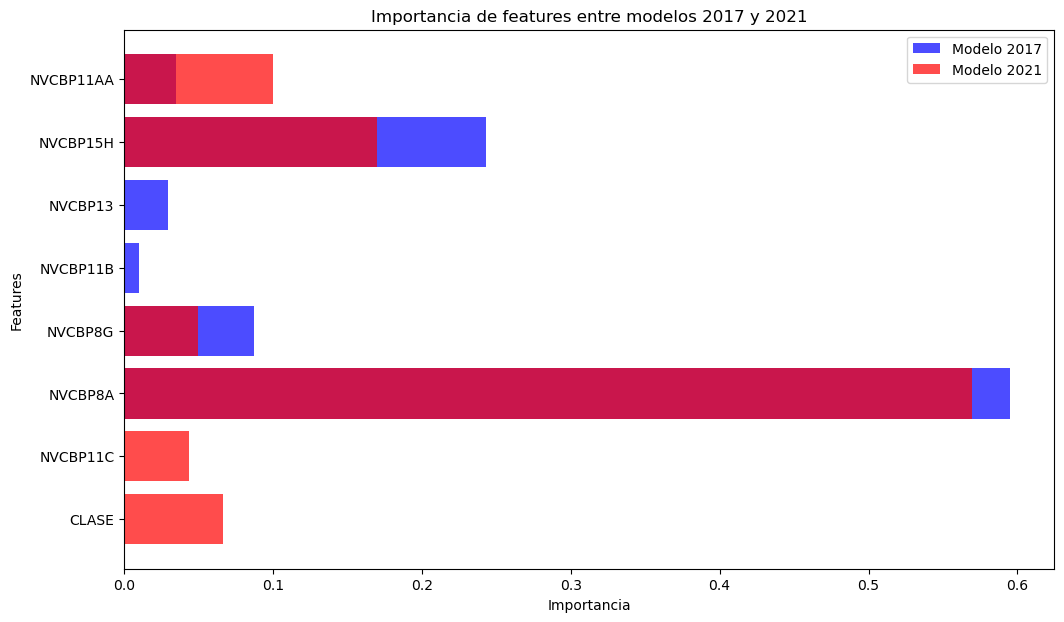

In [40]:
# Supongamos que tienes los dataframes feature_importance_df_17 y feature_importance_df_21

plt.figure(figsize=(12, 7))

# Gráfico de importancia de features para el modelo del 2017
plt.barh(feature_importance_df_17['Feature'], feature_importance_df_17['Importance'], color='blue', alpha=0.7, label='Modelo 2017')

# Gráfico de importancia de features para el modelo del 2021
plt.barh(feature_importance_df_21['Feature'], feature_importance_df_21['Importance'], color='red', alpha=0.7, label='Modelo 2021')

plt.xlabel('Importancia')
plt.ylabel('Features')
plt.title('Importancia de features entre modelos 2017 y 2021')
plt.legend()
plt.show()


### Valores reales vs predictos
Para ver la calidad del modelo un poco más visual, elaboraremos una gráfica comparativa

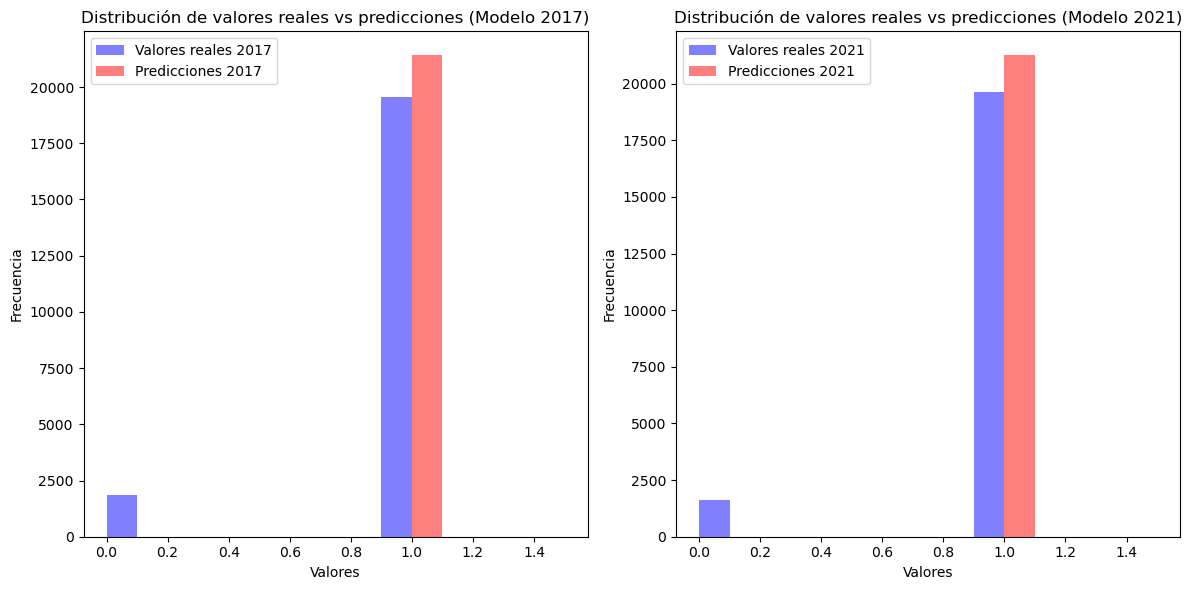

In [45]:
plt.figure(figsize=(12, 6))

# Histograma de valores reales y predicciones para el modelo del 2017
plt.subplot(1, 2, 1)
plt.hist(Y17_test, alpha=0.5, color='blue', label='Valores reales 2017')
plt.hist(preds_test_17, alpha=0.5, color='red', label='Predicciones 2017')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Distribución de valores reales vs predicciones (Modelo 2017)')
plt.legend()

# Histograma de valores reales y predicciones para el modelo del 2021
plt.subplot(1, 2, 2)
plt.hist(Y21_test, alpha=0.5, color='blue', label='Valores reales 2021')
plt.hist(preds_test_21, alpha=0.5, color='red', label='Predicciones 2021')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Distribución de valores reales vs predicciones (Modelo 2021)')
plt.legend()

plt.tight_layout()
plt.show()


## Conclusiones:

Desde varios puntos de vista, el mejor modelo es ... dado estas métricas:
1. Las métricas calculadas para los diferentes conjuntos de datos son un poco más altas. 
2. No existe evidencia de **overfitting** o **underfitting**.
3. se observa una relativamente baja varianza entre los resultados. Indicando una mayor estabilidad del modelo ante variaciones en los datos, característica común de los algoritmos de ensamble.
4. FN, FP cuál es más importante para el caso? Cuál modelo lo minimiza?

Cuál es la feature más influyente/importante para predecir la variable objetivo?